##### Inspect the first few rows #####
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


##### Missing values #####
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


##### Filling missing values #####
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


##### Checking duplicates #####
Duplicates in metadata: 0
Missing images: []


##### statistics of the dataset #####
                age
count  10015.000000
mean      51.863828
std       16.920252
min      

C:\Users\Purve\AppData\Local\Temp\ipykernel_13848\3124591972.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata['age'].fillna(metadata['age'].mean(), inplace=True)


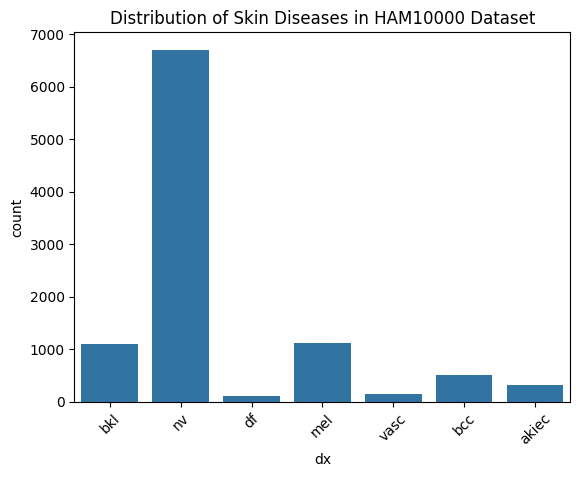

##### Displayed sample images #####


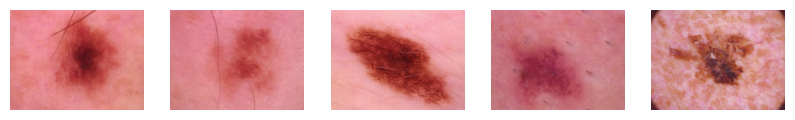

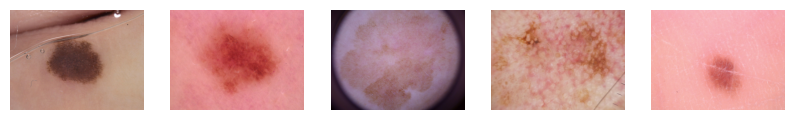

In [1]:
import pandas as pd              # For metadata inspection and manipulation
import matplotlib.pyplot as plt  # For visualizing data distribution and sample images
import seaborn as sns            # For visualizing class distribution
from PIL import Image            # For loading and inspecting images (or use OpenCV if you prefer)
import os                        # For navigating the file structure

# Read metadata from dataset    
metadata_path = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Inspect the first few rows
print("##### Inspect the first few rows #####")
print(metadata.head())
print("\n")

# Check for missing values
print("##### Missing values #####")
print(metadata.isnull().sum())
print("\n")

# Filing after missing values
print("##### Filling missing values #####")
metadata['age'].fillna(metadata['age'].mean(), inplace=True)
print(metadata.isnull().sum())
print("\n")

# Check duplicates
image_dir_1 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_1'
image_dir_2 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_2'
print("##### Checking duplicates #####")
# Check for duplicate entries in metadata
print(f"Duplicates in metadata: {metadata.duplicated().sum()}")
# Verify that all images listed in the metadata are present in the folders
image_ids = set(metadata['image_id'])
all_image_files = set(os.listdir(image_dir_1) + os.listdir(image_dir_2))
# Check if any image_id in metadata is missing in image files
missing_images = [img_id for img_id in image_ids if f"{img_id}.jpg" not in all_image_files]
print(f"Missing images: {missing_images}")
print("\n")

# Basic statistics of the dataset
print("##### statistics of the dataset #####")
print(metadata.describe())
print("\n")

# Visualize the distribution of diseases
print("##### Displayed distribution of diseases #####")
sns.countplot(data=metadata, x='dx')
plt.title("Distribution of Skin Diseases in HAM10000 Dataset")
plt.xticks(rotation=45)
plt.show()

# Image Inspection
print("##### Displayed sample images #####")

def display_sample_images(image_dir, num_samples=5):
    sample_files = os.listdir(image_dir)[:num_samples]
    plt.figure(figsize=(10,5))
    for i, filename in enumerate(sample_files):
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()   
display_sample_images(image_dir_1)
display_sample_images(image_dir_2)
print("\n")

